## Разработка программного модуля с применением методов машинного обучения для модели оценки режимов работы оборудования

### Первичный осмотр данных ГРЭС

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('./PrimarySamplingGRES.csv')

In [ ]:
filename = r"C:\Orders\2025\Leonid\GRES\PrimarySamplingGRES.csv"
data = pd.read_csv(filename)

In [3]:
data.head()

,DateHour,BoilerTempColdAirLeft1,BoilerTempColdAirLeft2,BoilerTempColdAirLeft3,BoilerTempColdAirLeft4,BoilerTempColdAirLeft5,BoilerTempColdAirLeft6,BoilerTempColdAirLeft7,BoilerTempColdAirLeft8,BoilerTempColdAirLeft9,...,TurbineTempFeedWater1,TurbineTempFeedWater2,TurbineTempFeedWater3,TurbineTempFeedWater4,TurbineTempFeedWater7,TurbineTempFeedWater5,TurbineTempFeedWater6,TurbineTempFeedWater8,StationTempOutdoorAir,StationConsumpElectricityTurbineUnit
0,2006-12-01 11:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-12-01 12:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-12-02 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1223.0
3,2006-12-07 16:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,225.6730,215.3514,NaN,181.0,210.1054,213.9243,-0.2720,NaN
4,2006-12-07 17:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,225.6568,215.3838,NaN,181.0,210.0568,214.1892,-0.7418,NaN


In [4]:
# Смотрим пропуски
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78488 entries, 0 to 78487
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DateHour                              78488 non-null  object 
 1   BoilerTempColdAirLeft1                3182 non-null   float64
 2   BoilerTempColdAirLeft2                3163 non-null   float64
 3   BoilerTempColdAirLeft3                3177 non-null   float64
 4   BoilerTempColdAirLeft4                2983 non-null   float64
 5   BoilerTempColdAirLeft5                3152 non-null   float64
 6   BoilerTempColdAirLeft6                3188 non-null   float64
 7   BoilerTempColdAirLeft7                3195 non-null   float64
 8   BoilerTempColdAirLeft8                3138 non-null   float64
 9   BoilerTempColdAirLeft9                3185 non-null   float64
 10  BoilerTempColdAirLeft10               3125 non-null   float64
 11  BoilerTempColdA

In [5]:
data.shape

(78488, 50)

In [6]:
data.describe()

,BoilerTempColdAirLeft1,BoilerTempColdAirLeft2,BoilerTempColdAirLeft3,BoilerTempColdAirLeft4,BoilerTempColdAirLeft5,BoilerTempColdAirLeft6,BoilerTempColdAirLeft7,BoilerTempColdAirLeft8,BoilerTempColdAirLeft9,BoilerTempColdAirLeft10,...,TurbineTempFeedWater1,TurbineTempFeedWater2,TurbineTempFeedWater3,TurbineTempFeedWater4,TurbineTempFeedWater7,TurbineTempFeedWater5,TurbineTempFeedWater6,TurbineTempFeedWater8,StationTempOutdoorAir,StationConsumpElectricityTurbineUnit
count,3182.000000,3163.000000,3177.000000,2983.000000,3152.000000,3188.000000,3195.000000,3138.000000,3185.000000,3125.000000,...,71769.000000,77729.000000,78410.000000,77972.000000,78148.000000,78451.000000,72945.000000,78451.000000,78435.000000,3226.000000
mean,3.434161,-0.638160,0.637079,1.952363,2.066466,0.559599,4.735994,3.215328,1.602198,2.422208,...,180.854066,195.364678,190.643919,171.091231,163.056143,191.856658,195.586787,199.983255,3.428785,83.518559
std,13.447108,13.035161,14.865660,14.271756,13.921849,16.290678,13.866696,13.960372,13.165915,14.564500,...,49.029884,35.109491,50.651829,51.857380,45.296448,30.075319,33.962080,25.431858,14.163401,25.535938
min,-37.400000,-37.400000,-37.400000,-37.400000,-37.400000,-37.400000,-36.000000,-37.400000,-36.000000,-37.400000,...,30.000000,12.648600,60.000000,60.000000,60.000000,94.000000,-50.000000,28.000000,-41.000000,39.995000
25%,-5.100000,-8.500000,-10.900000,-9.750000,-7.400000,-10.600000,-5.700000,-5.100000,-7.100000,-9.700000,...,105.000000,158.513500,184.449300,105.000000,151.054200,176.527400,185.855000,194.837800,-6.188200,71.025000
50%,5.000000,-2.100000,1.400000,4.100000,3.500000,2.600000,8.400000,4.400000,1.200000,5.000000,...,206.505400,208.100000,211.743200,197.227450,153.105400,200.073700,207.432400,210.048600,4.416500,82.193000
75%,14.400000,8.800000,15.300000,15.600000,15.100000,15.000000,15.700000,15.300000,15.000000,13.700000,...,221.408100,223.009400,223.229100,216.318900,207.116700,215.402650,214.070300,216.973000,14.849500,94.908250
max,26.900000,26.800000,26.900000,24.800000,26.900000,28.100000,26.600000,28.100000,28.700000,28.100000,...,237.000000,240.616700,239.024300,237.221600,234.141700,235.000000,234.458300,236.000000,38.220800,1223.000000


In [7]:
data.columns

Index(['DateHour', 'BoilerTempColdAirLeft1', 'BoilerTempColdAirLeft2',
       'BoilerTempColdAirLeft3', 'BoilerTempColdAirLeft4',
       'BoilerTempColdAirLeft5', 'BoilerTempColdAirLeft6',
       'BoilerTempColdAirLeft7', 'BoilerTempColdAirLeft8',
       'BoilerTempColdAirLeft9', 'BoilerTempColdAirLeft10',
       'BoilerTempColdAirLeft11', 'BoilerTempColdAirRight1',
       'BoilerTempColdAirRight2', 'BoilerTempColdAirRight3',
       'BoilerTempColdAirRight4', 'BoilerTempColdAirRight5',
       'BoilerTempColdAirRight6', 'BoilerTempColdAirRight7',
       'BoilerTempColdAirRight8', 'BoilerTempColdAirRight9',
       'BoilerTempColdAirRight10', 'BoilerTempColdAirRight11',
       'StationConsumpNaturalFuel', 'StationConsumpMasut', 'StationCoalAsh',
       'StationCoalHumidity', 'StationConsumpOTPKaltan1',
       'StationConsumpOTPHP', 'StationConsumpOTPOsinniki',
       'StationConsumpOTPTHF', 'StationConsumpOTPKVOiT', 'TurbineUnitPower1',
       'TurbineUnitPower2', 'TurbineUnitPower3', 'Tu

### Предобработка данных

#### Унификация временных рядов

In [8]:
# Преобразуем столбец с датами в datetime, если еще не сделано
data['DateHour'] = pd.to_datetime(data['DateHour'])

# Создаем полный диапазон дат
min_date = data['DateHour'].min()
max_date = data['DateHour'].max()
full_dates = pd.date_range(min_date, max_date, freq='h')  # 'H' для часового интервала

# Создаем полный DataFrame и соединяем с данными
full_data = data.set_index('DateHour').reindex(full_dates)

# Восстанавливаем имя индекса
full_data.index.name = 'DateHour'
full_data

,BoilerTempColdAirLeft1,BoilerTempColdAirLeft2,BoilerTempColdAirLeft3,BoilerTempColdAirLeft4,BoilerTempColdAirLeft5,BoilerTempColdAirLeft6,BoilerTempColdAirLeft7,BoilerTempColdAirLeft8,BoilerTempColdAirLeft9,BoilerTempColdAirLeft10,...,TurbineTempFeedWater1,TurbineTempFeedWater2,TurbineTempFeedWater3,TurbineTempFeedWater4,TurbineTempFeedWater7,TurbineTempFeedWater5,TurbineTempFeedWater6,TurbineTempFeedWater8,StationTempOutdoorAir,StationConsumpElectricityTurbineUnit
DateHour,,,,,,,,,,,,,,,,,,,,,
2006-12-01 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-01 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-01 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-01 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-20 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105.0,105.0,105.0,216.8838,80.0000,218.8225,218.2054,150.0,-27.7334,NaN
2016-01-20 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105.0,105.0,105.0,221.3189,164.0185,220.0207,219.2135,150.0,-28.2680,NaN
2016-01-20 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105.0,105.0,105.0,222.6649,198.2838,220.8691,222.2973,150.0,-28.7335,NaN


#### Агрегирование данных

In [10]:
colBoiler = ['BoilerTempColdAirLeft1',
             'BoilerTempColdAirLeft2',
             'BoilerTempColdAirLeft3',
             'BoilerTempColdAirLeft4',
             'BoilerTempColdAirLeft5',
             'BoilerTempColdAirLeft6',
             'BoilerTempColdAirLeft7',
             'BoilerTempColdAirLeft8',
             'BoilerTempColdAirLeft9',
             'BoilerTempColdAirLeft10',
             'BoilerTempColdAirLeft11',
             'BoilerTempColdAirRight1',
             'BoilerTempColdAirRight2',
             'BoilerTempColdAirRight3',
             'BoilerTempColdAirRight4',
             'BoilerTempColdAirRight5',
             'BoilerTempColdAirRight6',
             'BoilerTempColdAirRight7',
             'BoilerTempColdAirRight8',
             'BoilerTempColdAirRight9',
             'BoilerTempColdAirRight10',
             'BoilerTempColdAirRight11']

colTurb = ['TurbineUnitPower1',
           'TurbineUnitPower2',
           'TurbineUnitPower3',
           'TurbineUnitPower4',
           'TurbineUnitPower5',
           'TurbineUnitPower6',
           'TurbineUnitPower7',
           'TurbineUnitPower8']

colOTP = ['StationConsumpOTPKaltan1',
          'StationConsumpOTPHP',
          'StationConsumpOTPOsinniki',
          'StationConsumpOTPTHF',
          'StationConsumpOTPKVOiT']

colWater = ['TurbineTempFeedWater1',
            'TurbineTempFeedWater2',
            'TurbineTempFeedWater3',
            'TurbineTempFeedWater4',
            'TurbineTempFeedWater7',
            'TurbineTempFeedWater5',
            'TurbineTempFeedWater6',
            'TurbineTempFeedWater8']

agg_data = (
    full_data
    #Определение моды температуры воздуха
    .assign(BoilerTempColdAirMode = lambda x: x[colBoiler].apply(lambda y: y.value_counts(dropna = False).idxmax(), axis = 1))
    #Определение минимальной температуры воздуха на датчиках
    .assign(BoilerTempColdAirMin = lambda x: x[colBoiler].min(axis = 1))
    #Определение нижнего квартиля температуры воздуха на датчиках
    .assign(BoilerTempColdAirQ1 = lambda x: x[colBoiler].quantile(q = 0.25, axis = 1))
    #Определение медианной температуры воздуха на датчиках
    .assign(BoilerTempColdAirQ2 = lambda x: x[colBoiler].quantile(q = 0.5, axis = 1))
    #Определение верхнего квартиля температуры воздуха на датчиках
    .assign(BoilerTempColdAirQ3 = lambda x: x[colBoiler].quantile(q = 0.75, axis = 1))
    #Определение максимальной температуры воздуха на датчиках
    .assign(BoilerTempColdAirMax = lambda x: x[colBoiler].max(axis = 1))
    #Определение моды температуры воды
    .assign(TurbineTempFeedWaterMode = lambda x: x[colWater].apply(lambda y: y.value_counts(dropna = False).idxmax(), axis = 1))
    #Определение минимальной температуры воды на датчиках
    .assign(TurbineTempFeedWaterMin = lambda x: x[colWater].min(axis = 1))
    #Определение нижнего квартиля температуры воды на датчиках
    .assign(TurbineTempFeedWaterQ1 = lambda x: x[colWater].quantile(q = 0.25, axis = 1))
    #Определение медианной температуры воды на датчиках
    .assign(TurbineTempFeedWaterQ2 = lambda x: x[colWater].quantile(q = 0.5, axis = 1))
    #Определение верхнего квартиля температуры воды на датчиках
    .assign(TurbineTempFeedWaterQ3 = lambda x: x[colWater].quantile(q = 0.75, axis = 1))
    #Определение максимальной температуры воды на датчиках
    .assign(TurbineTempFeedWaterMax = lambda x: x[colWater].max(axis = 1))
    #Агрегация данных мощности турбин
    .assign(TurbinePowerSum = lambda x: x[colTurb].sum(axis=1))
    #Агрегация данных суммарного расхода ОТП топлива
    .assign(StationConsumpOTPSum = lambda x: x[colOTP].sum(axis=1))
    #Удаление ненужных столбцов
    .drop(columns = colBoiler + colTurb  + colOTP + colWater)
)

agg_data

,StationConsumpNaturalFuel,StationConsumpMasut,StationCoalAsh,StationCoalHumidity,StationTempOutdoorAir,StationConsumpElectricityTurbineUnit,BoilerTempColdAirMode,BoilerTempColdAirMin,BoilerTempColdAirQ1,BoilerTempColdAirQ2,BoilerTempColdAirQ3,BoilerTempColdAirMax,TurbineTempFeedWaterMode,TurbineTempFeedWaterMin,TurbineTempFeedWaterQ1,TurbineTempFeedWaterQ2,TurbineTempFeedWaterQ3,TurbineTempFeedWaterMax,TurbinePowerSum,StationConsumpOTPSum
DateHour,,,,,,,,,,,,,,,,,,,,
2006-12-01 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,2929.1000
2006-12-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,1139.0000
2006-12-01 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000
2006-12-01 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000
2006-12-01 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-20 05:00:00,NaN,NaN,NaN,NaN,-27.7334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,80.0,105.0,127.50000,217.214200,218.8225,197.5433,3113.4021
2016-01-20 06:00:00,NaN,NaN,NaN,NaN,-28.2680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,105.0,105.0,157.00925,219.415300,221.3189,216.2168,3113.9282
2016-01-20 07:00:00,NaN,NaN,NaN,NaN,-28.7335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,105.0,105.0,174.14190,221.226150,222.6649,227.5484,3112.3538


In [5]:
outputs = [
    'StationConsumpElectricityTurbineUnit',
    'TurbinePowerSum',
    'StationConsumpOTPSum'
]

inputs = [
    'StationCoalHumidity', 
    'StationCoalAsh', 
    'StationConsumpNaturalFuel',
    'BoilerTempColdAirMode',
    'BoilerTempColdAirMin',
    'BoilerTempColdAirQ1',
    'BoilerTempColdAirQ2',
    'BoilerTempColdAirQ3',
    'BoilerTempColdAirMax',
    'TurbineTempFeedWaterMode',
    'TurbineTempFeedWaterMin',
    'TurbineTempFeedWaterQ1',
    'TurbineTempFeedWaterQ2',
    'TurbineTempFeedWaterQ3',
    'TurbineTempFeedWaterMax',
    'StationTempOutdoorAir'
]

In [6]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80087 entries, 2006-12-01 11:00:00 to 2016-01-20 09:00:00
Freq: h
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   StationConsumpNaturalFuel             3224 non-null   float64
 1   StationConsumpMasut                   2446 non-null   float64
 2   StationCoalAsh                        3222 non-null   float64
 3   StationCoalHumidity                   3222 non-null   float64
 4   StationTempOutdoorAir                 78435 non-null  float64
 5   StationConsumpElectricityTurbineUnit  3226 non-null   float64
 6   BoilerTempColdAirMode                 3161 non-null   float64
 7   BoilerTempColdAirMin                  3221 non-null   float64
 8   BoilerTempColdAirQ1                   3221 non-null   float64
 9   BoilerTempColdAirQ2                   3221 non-null   float64
 10  BoilerTempColdAirQ3                   3

#### Строим графики

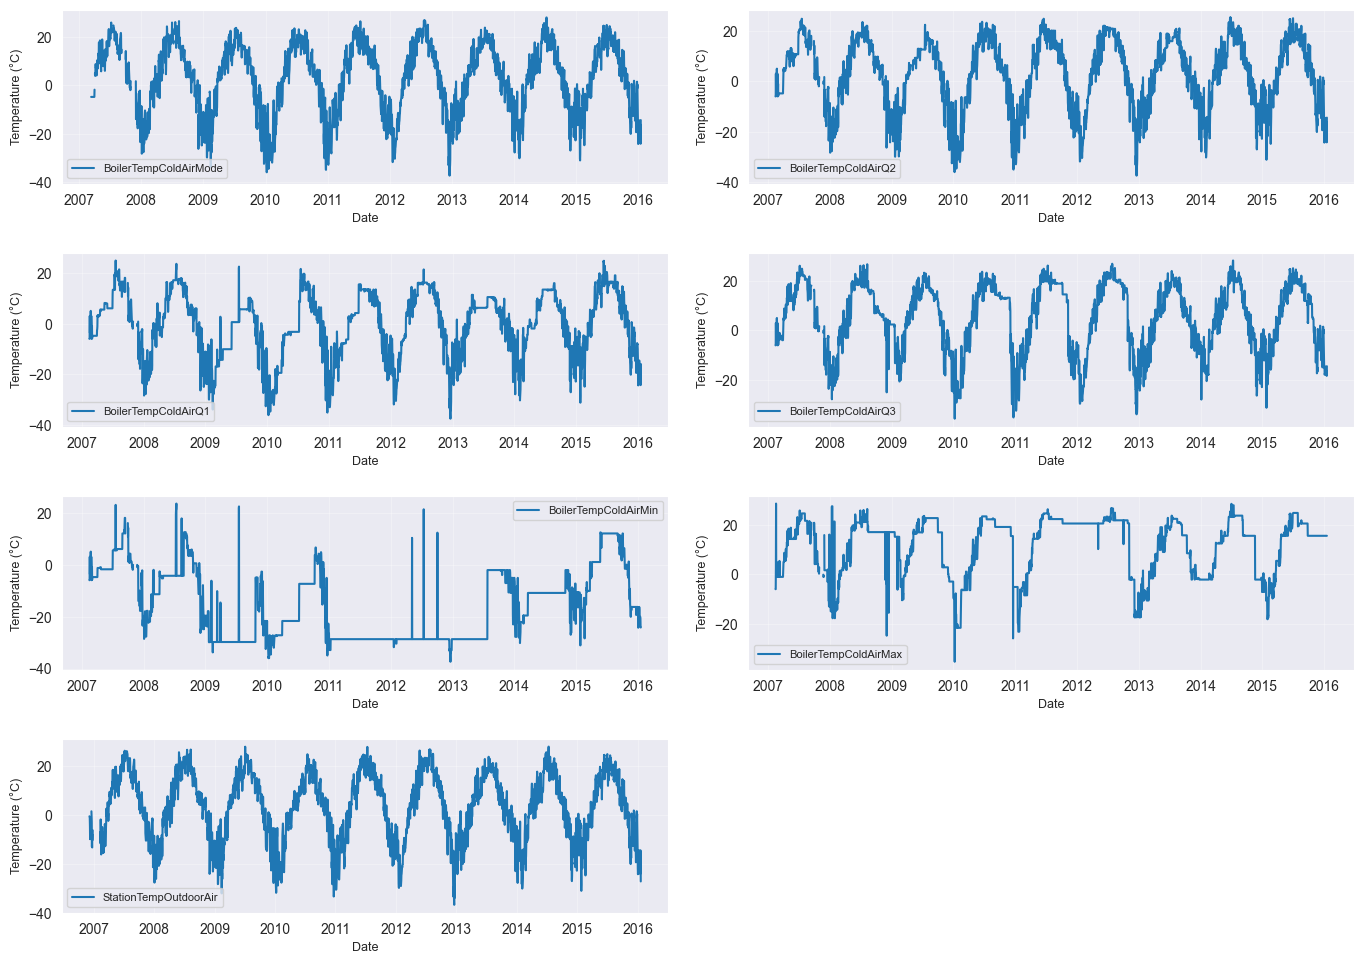

In [7]:
fig, axes = plt.subplots(4, 2, figsize=(14, 10))
daily = agg_data.resample('D').mean()

columns = ['BoilerTempColdAirMode', 'BoilerTempColdAirQ2',
           'BoilerTempColdAirQ1', 'BoilerTempColdAirQ3',
           'BoilerTempColdAirMin', 'BoilerTempColdAirMax',
           'StationTempOutdoorAir']

for ax, col in zip(axes.flat, columns):
    ax.plot(daily[col], label=col)
    ax.set_ylabel('Temperature (°C)', fontsize=9)
    ax.set_xlabel('Date', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)

if len(columns) < 8:
    axes.flat[-1].axis('off')

plt.tight_layout(pad=2.0)
plt.show()

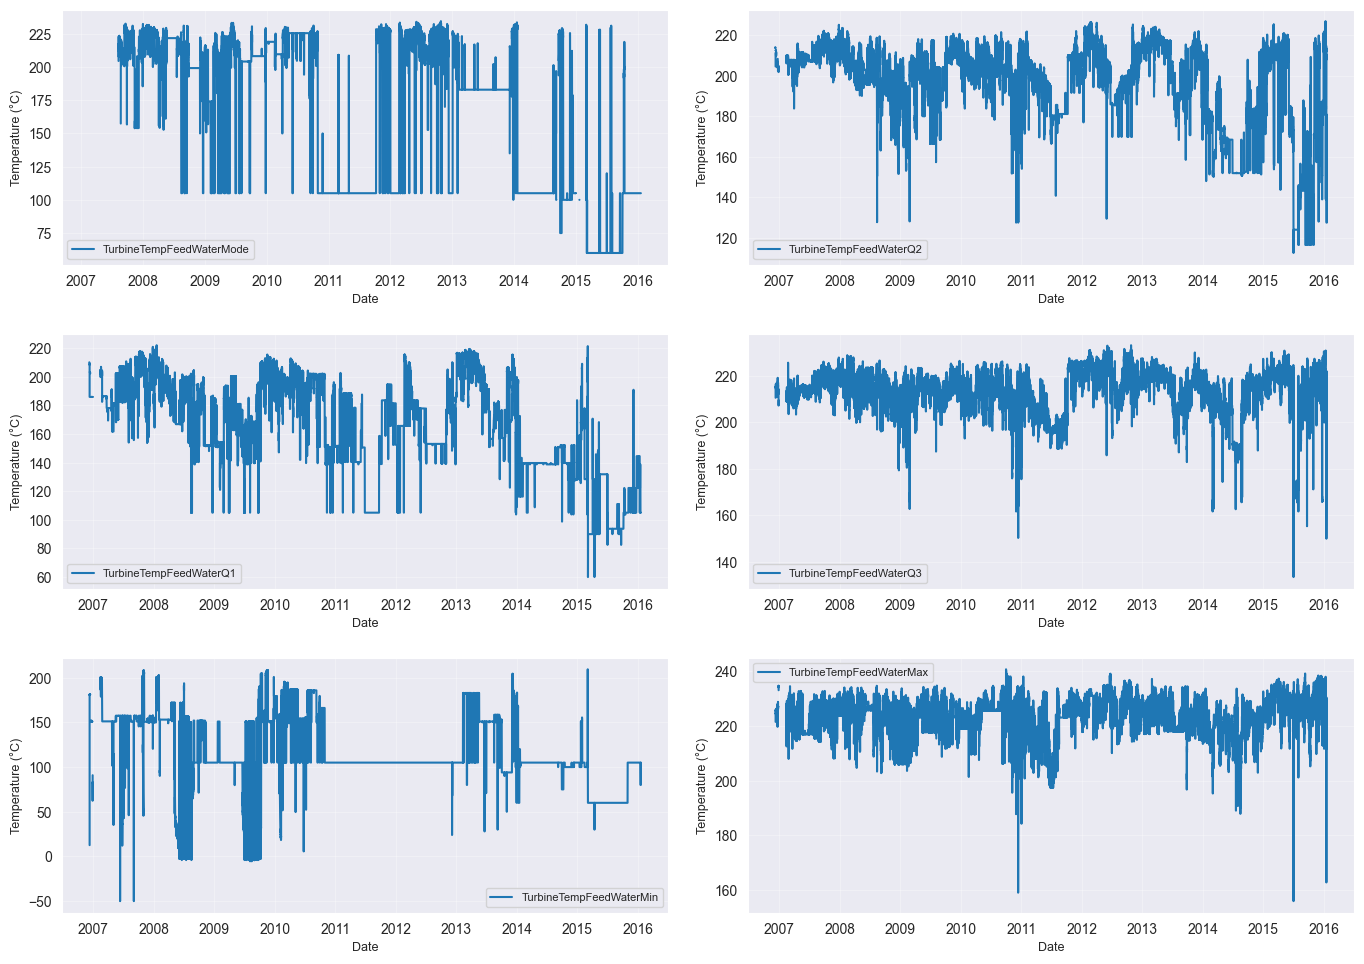

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
daily = agg_data

columns = ['TurbineTempFeedWaterMode', 'TurbineTempFeedWaterQ2',
           'TurbineTempFeedWaterQ1', 'TurbineTempFeedWaterQ3',
           'TurbineTempFeedWaterMin', 'TurbineTempFeedWaterMax',]

for ax, col in zip(axes.flat, columns):
    ax.plot(daily[col], label=col)
    ax.set_ylabel('Temperature (°C)', fontsize=9)
    ax.set_xlabel('Date', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)

plt.tight_layout(pad=2.0)
plt.show()

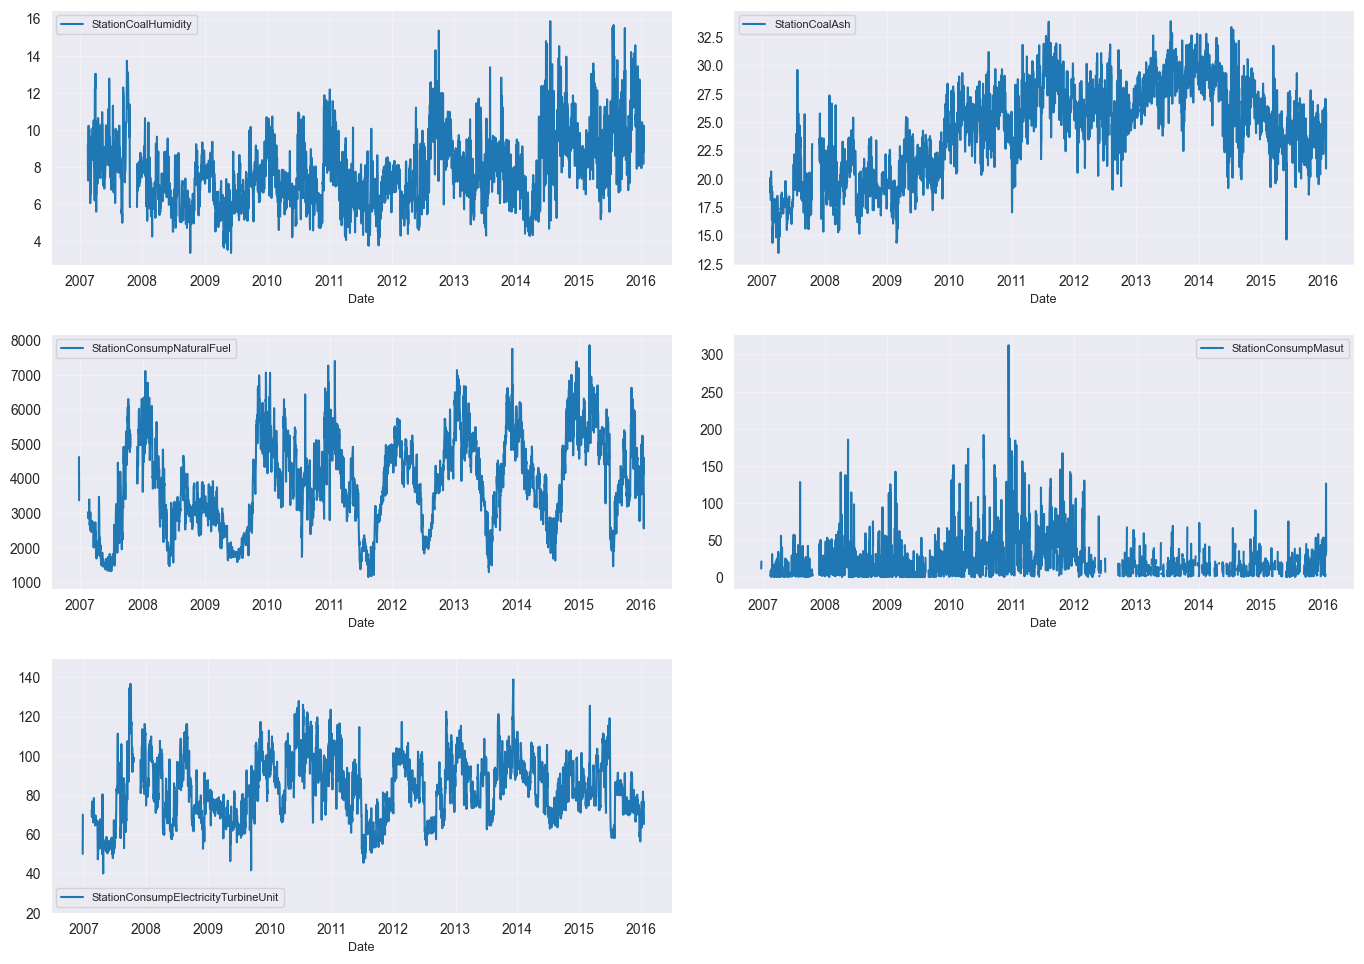

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
daily = agg_data.resample('D').mean()

columns = ['StationCoalHumidity', 'StationCoalAsh',
           'StationConsumpNaturalFuel', 'StationConsumpElectricityTurbineUnit']

for ax, col in zip(axes.flat, columns):
    ax.plot(daily[col], label=col)
    ax.set_xlabel('Date', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)
    if col == 'StationConsumpElectricityTurbineUnit':
        ax.set_ylim(20, 150)

if len(columns) < 6:
    axes.flat[-1].axis('off')

plt.tight_layout(pad=2.0)
plt.show()

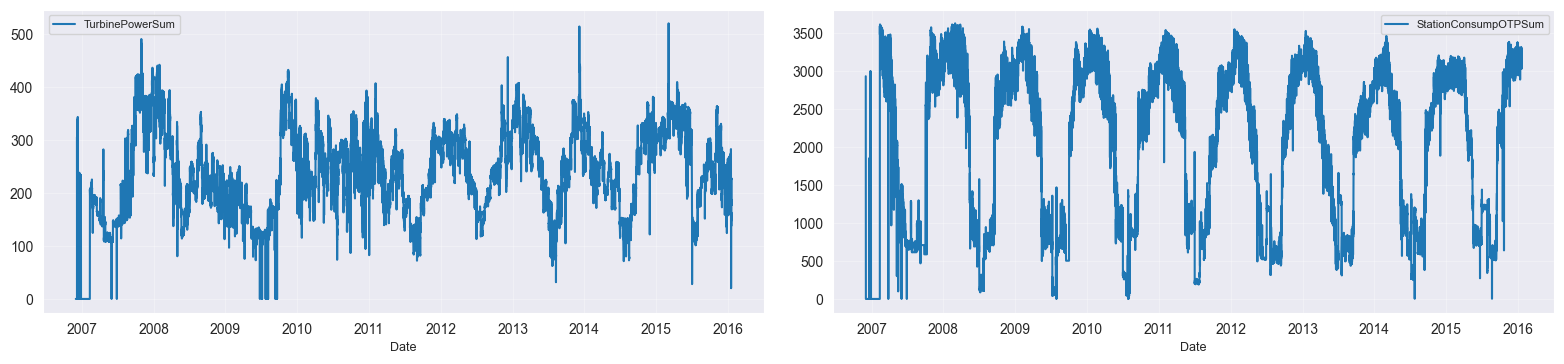

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
daily = agg_data

columns = ['TurbinePowerSum', 'StationConsumpOTPSum']

for ax, col in zip(axes.flat, columns):
    ax.plot(daily[col], label=col)
    ax.set_xlabel('Date', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)

plt.tight_layout(pad=2.0)
plt.show()

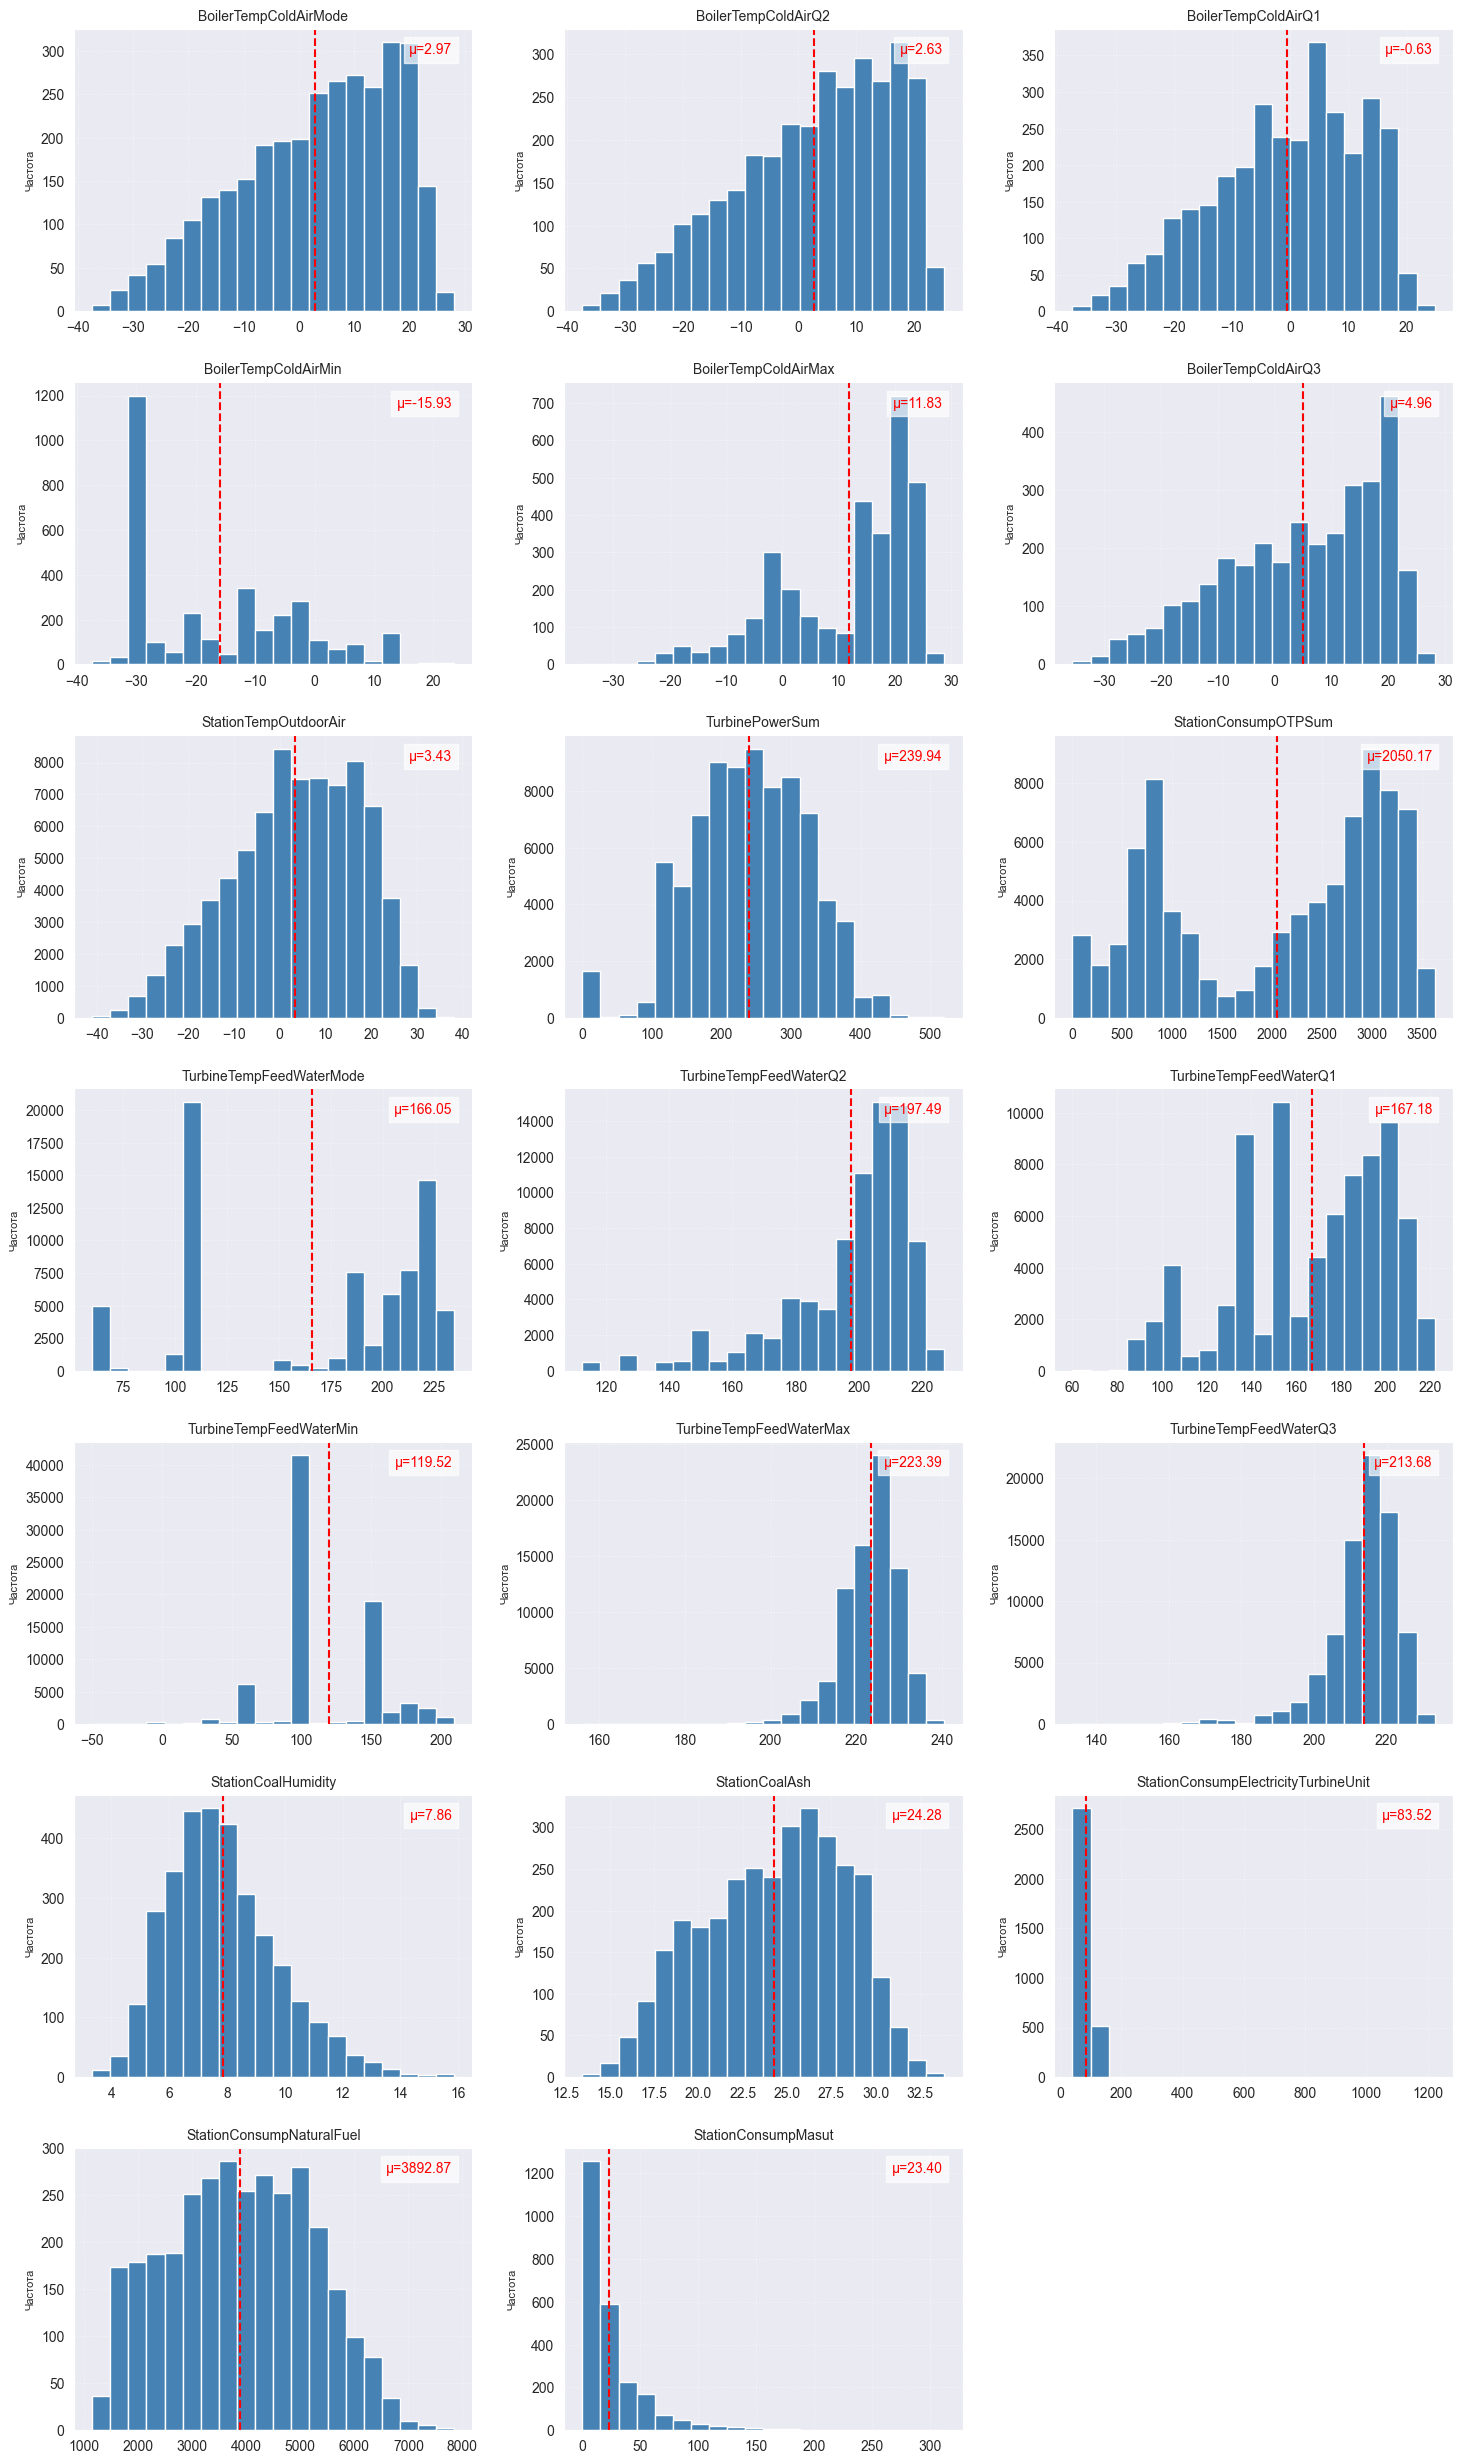

In [11]:
fig, axes = plt.subplots(7, 3, figsize=(15, 25))
axes = axes.flatten()
columns = [
    'BoilerTempColdAirMode', 'BoilerTempColdAirQ2', 'BoilerTempColdAirQ1',
    'BoilerTempColdAirMin', 'BoilerTempColdAirMax', 'BoilerTempColdAirQ3',
    'StationTempOutdoorAir', 'TurbinePowerSum', 'StationConsumpOTPSum',
    'TurbineTempFeedWaterMode', 'TurbineTempFeedWaterQ2', 'TurbineTempFeedWaterQ1',
    'TurbineTempFeedWaterMin', 'TurbineTempFeedWaterMax', 'TurbineTempFeedWaterQ3',
    'StationCoalHumidity', 'StationCoalAsh', 'StationConsumpElectricityTurbineUnit',
    'StationConsumpNaturalFuel', 'StationConsumpMasut'
]

for i, col in enumerate(columns):
    ax = axes[i]
    n, bins, patches = ax.hist(agg_data[col].dropna(), bins=20, color='steelblue', edgecolor='white')
    mean_val = agg_data[col].mean()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5)
    ax.text(0.95, 0.95, f'μ={mean_val:.2f}',
           transform=ax.transAxes, ha='right', va='top',
           color='red',
           bbox=dict(facecolor='white', alpha=0.7))
    ax.set_title(col, fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Частота', fontsize=8)
    ax.grid(True, linestyle=':', alpha=0.5)

for i in range(len(columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout(pad=2.0)
plt.show()

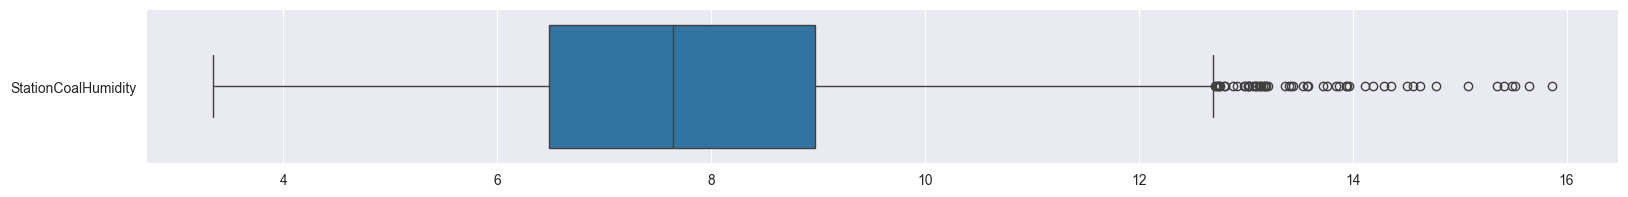

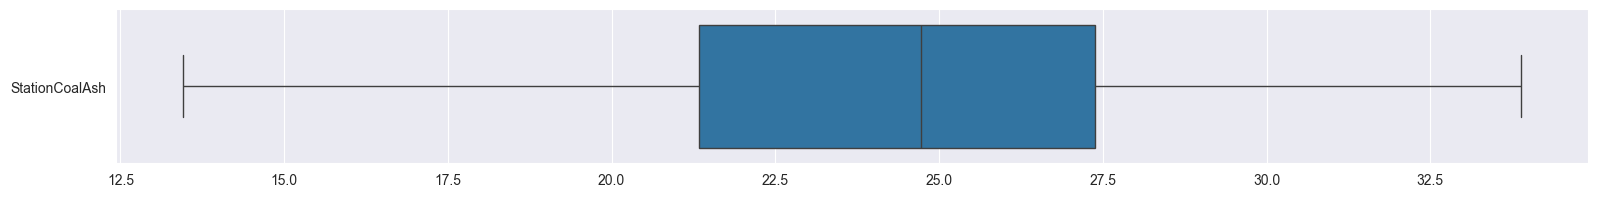

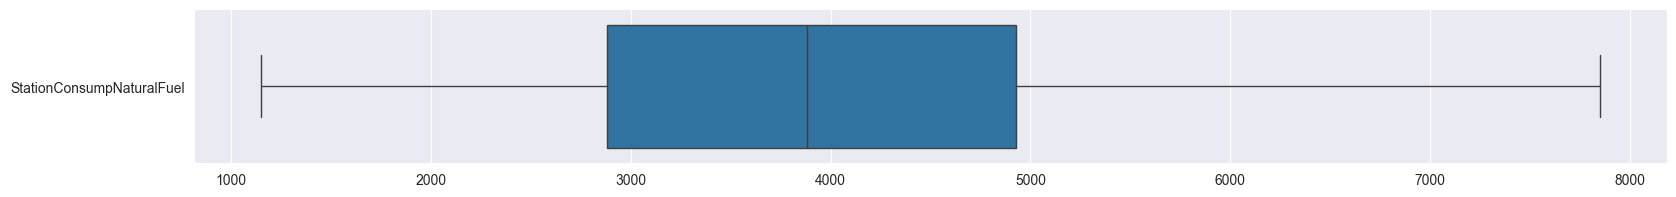

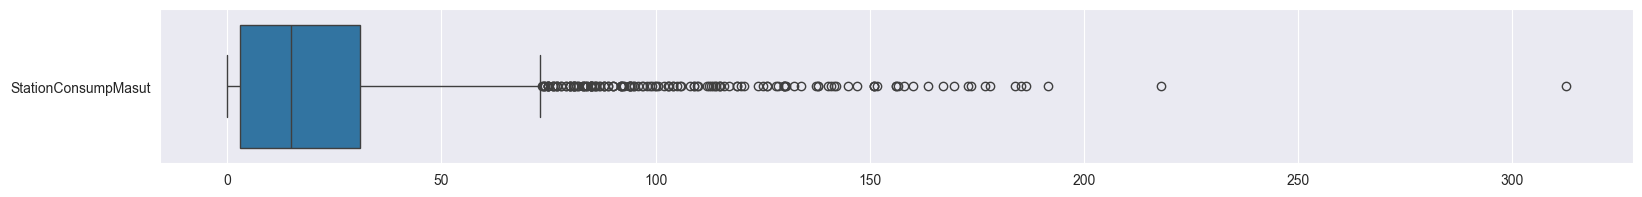

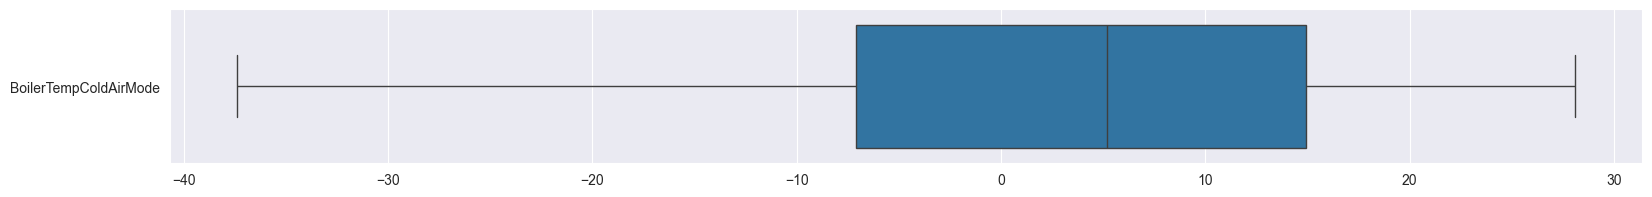

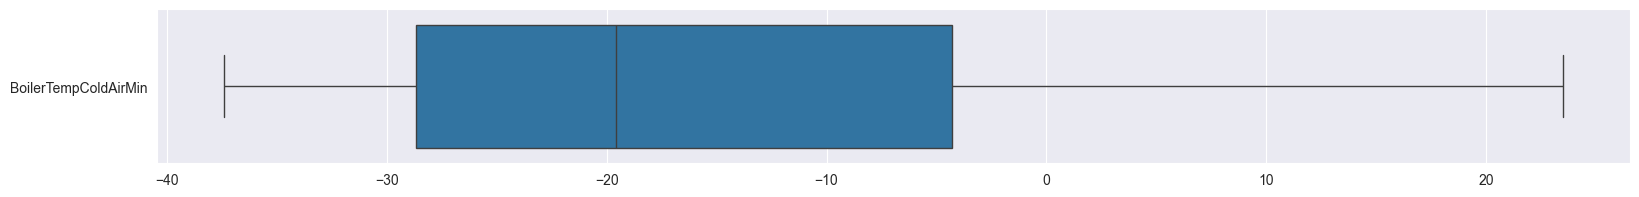

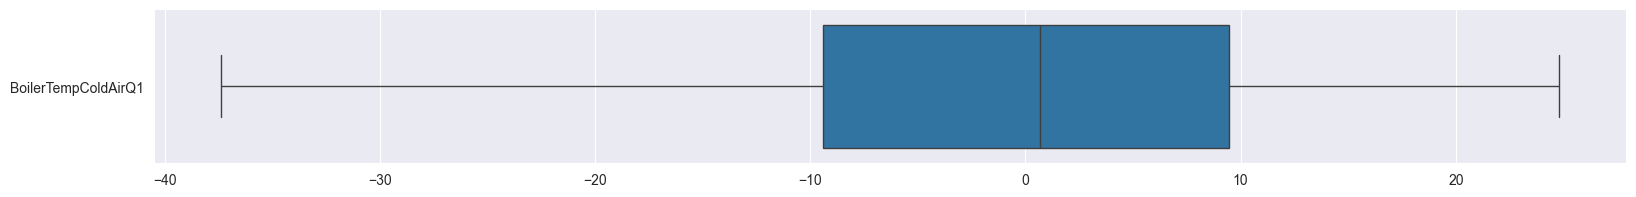

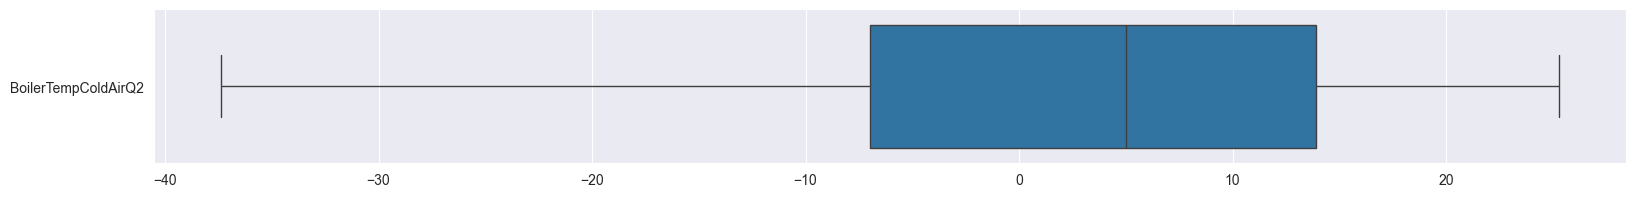

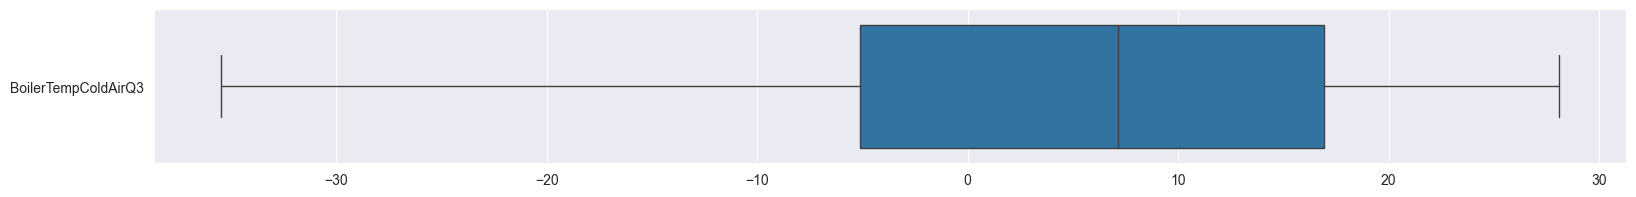

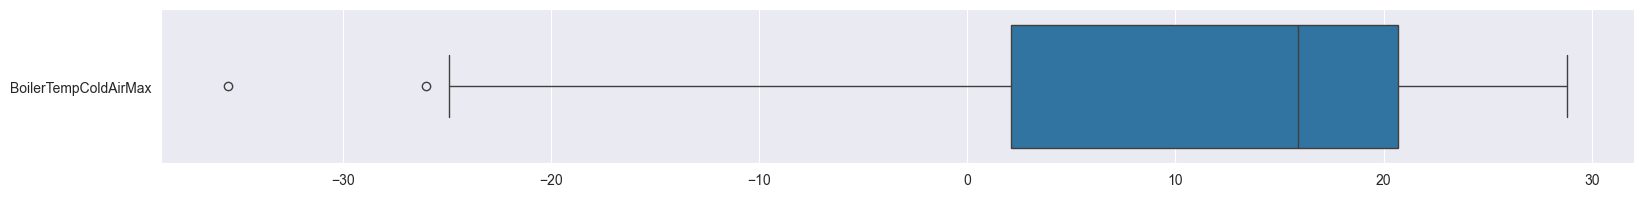

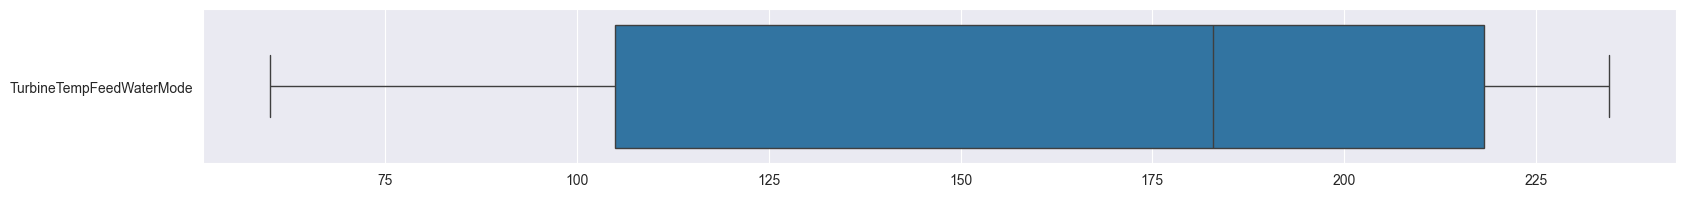

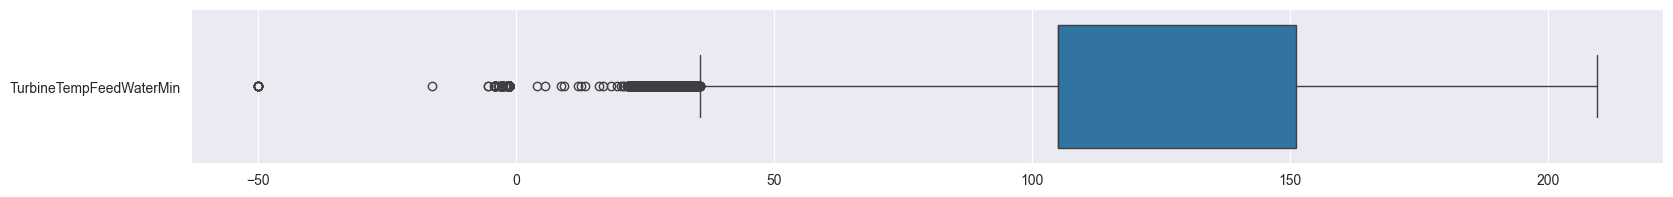

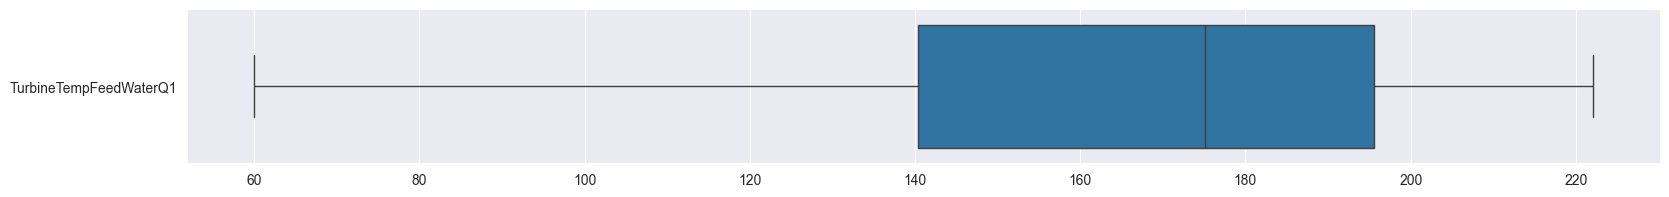

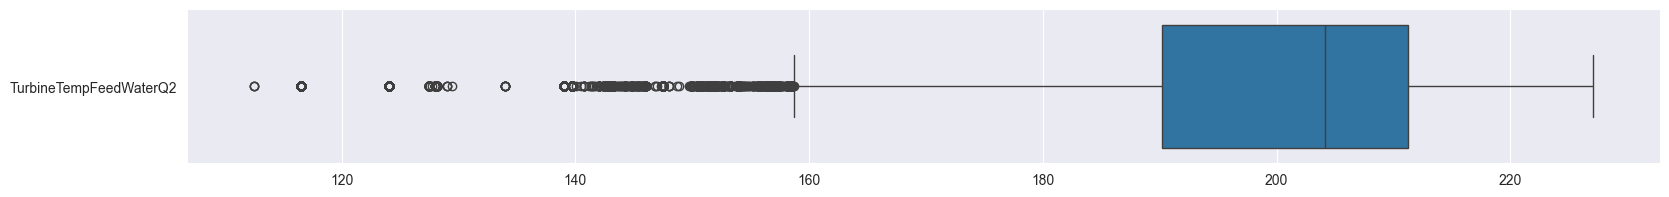

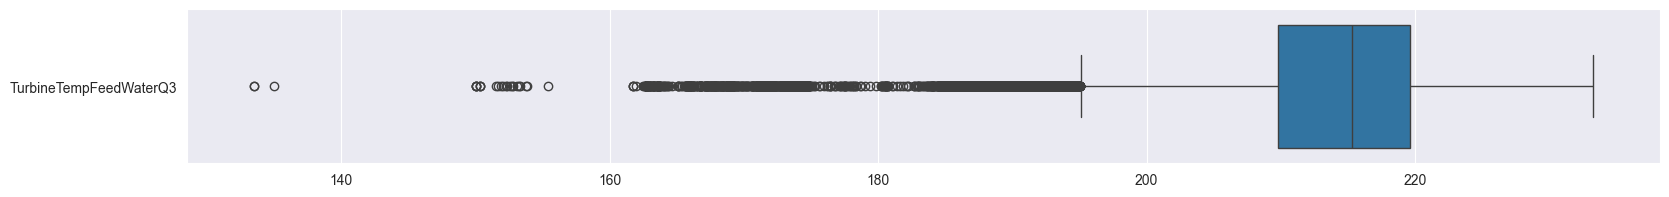

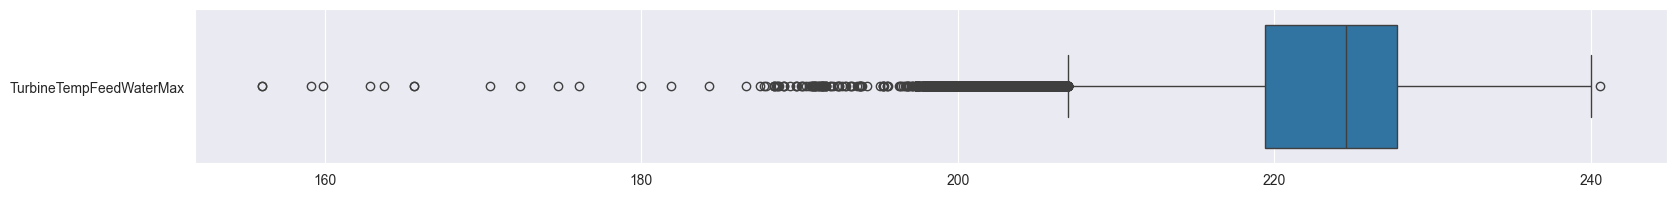

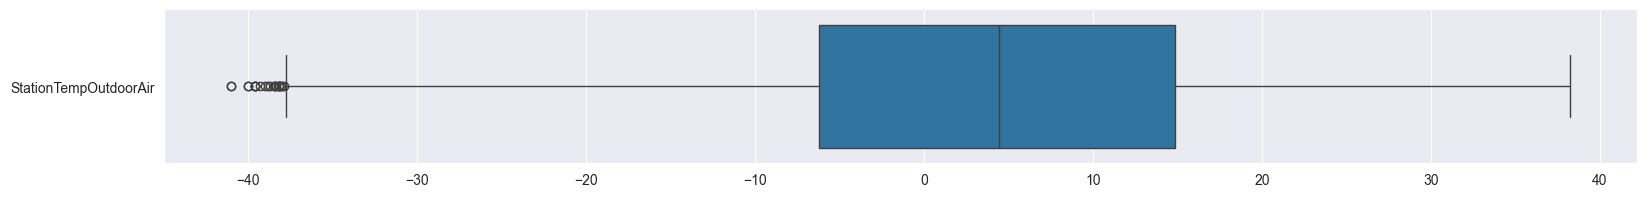

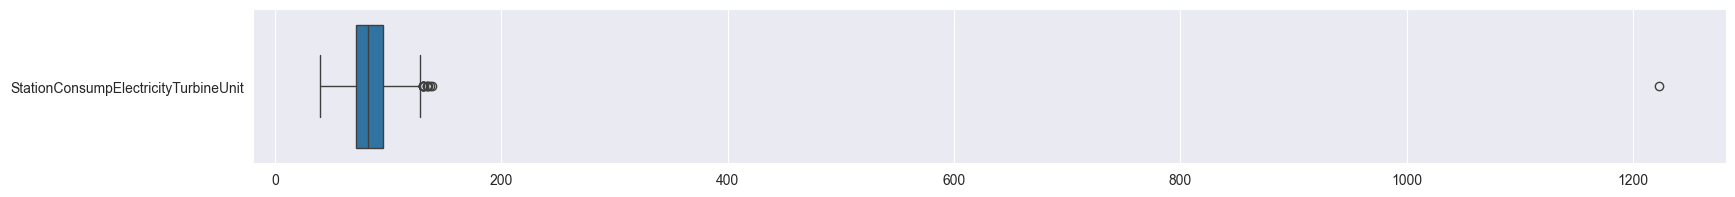

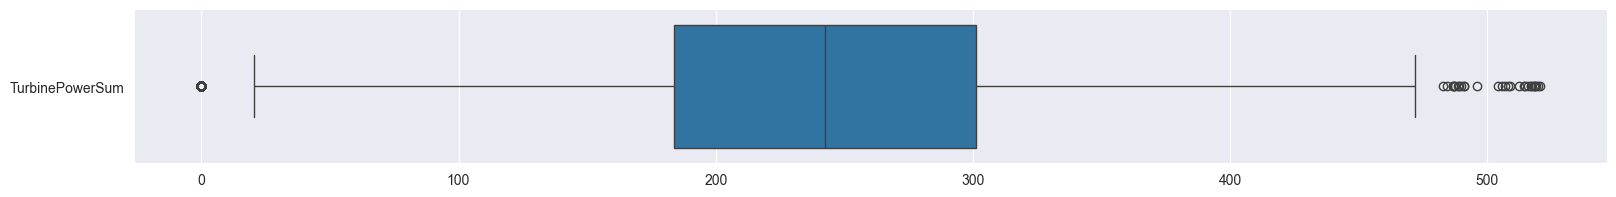

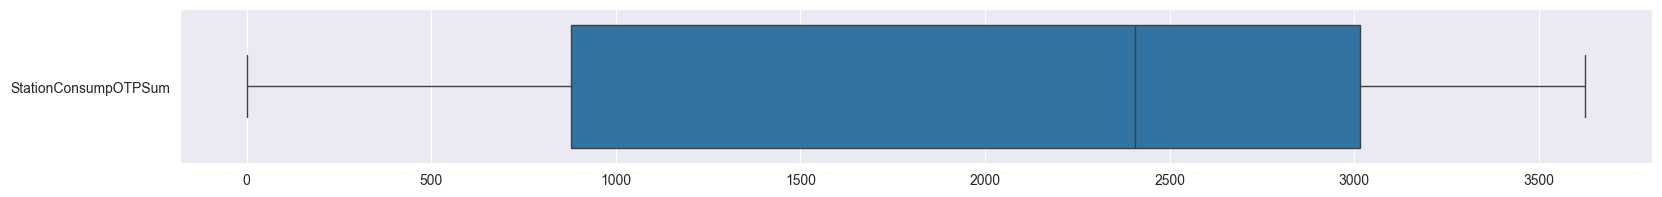

In [12]:
for feature_name in (inputs + outputs):
    plt.figure(figsize=(19,2))
    sns.boxplot( data=agg_data[[feature_name]], orient='h')

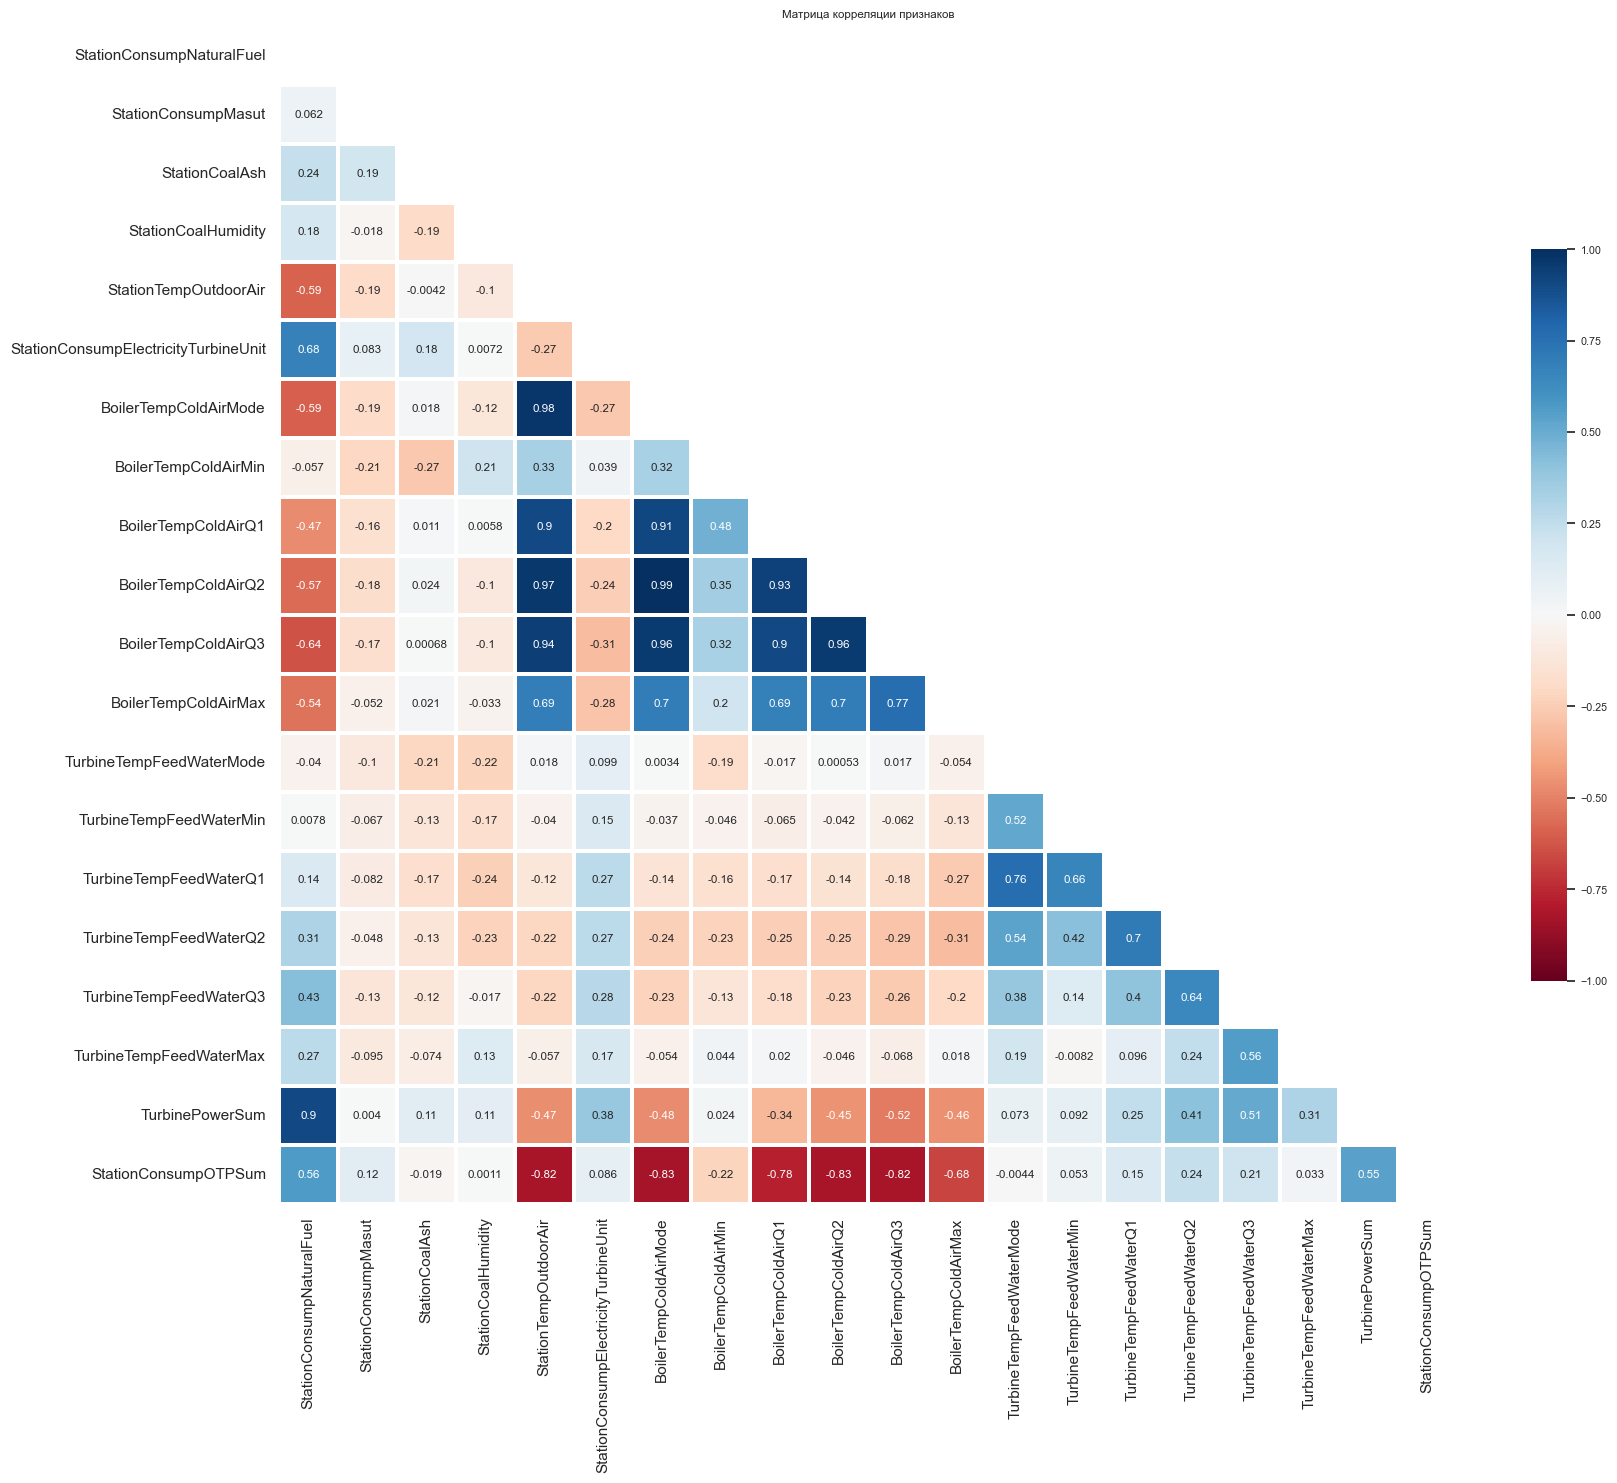

In [13]:
corr_df = agg_data.corr(method="pearson")

sns.set(style="white")
mask = np.zeros_like(corr_df, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(19,19))
sns.set(font_scale=0.7)

sns.heatmap(data=corr_df,
            vmin=-1, vmax=1, center=0,
            annot=True,
            cmap = 'RdBu',
            mask=mask,
            square=True,
            linewidths=1.5,
            cbar_kws={"shrink": .5}
           )

plt.title(u'Матрица корреляции признаков');
plt.show()

### Строим модель

In [102]:
target = 'TurbinePowerSum'

features = [
    'TurbineTempFeedWaterMode',
    'TurbineTempFeedWaterMin',
    'TurbineTempFeedWaterQ1',
    'TurbineTempFeedWaterQ2',
    'TurbineTempFeedWaterQ3',
    'TurbineTempFeedWaterMax',
    'StationTempOutdoorAir'
]

<Axes: xlabel='DateHour'>

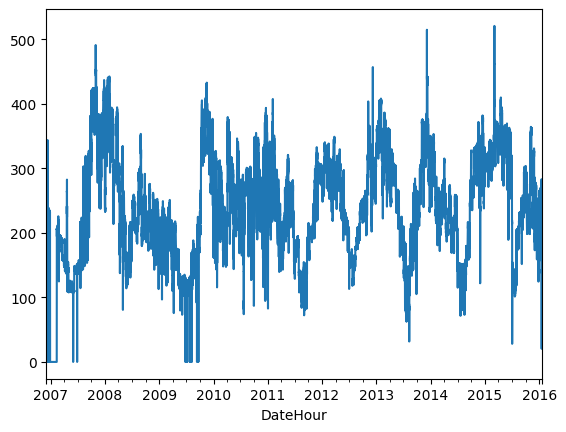

In [15]:
agg_data[target].plot()

In [3]:
import statsmodels.api as sm

In [17]:
data1 = agg_data.loc['2010':, [target] + ['StationTempOutdoorAir', 'TurbineTempFeedWaterQ2']].ffill()

In [4]:
#data1.to_pickle(r"C:\Orders\2025\Leonid\GRES\data_for_forecast.pkl")
data1 = pd.read_pickle(r"C:\Orders\2025\Leonid\GRES\data_for_forecast.pkl")

In [12]:
mod = sm.tsa.statespace.SARIMAX(
    endog = data1[target], 
    exog = data1[['StationTempOutdoorAir', 'TurbineTempFeedWaterQ2']], 
    trend='c', 
    order=(1,0,1),
    #seasonal_order = (1, 0, 0, 12),
    freq = 'h'
)

res = mod.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:        TurbinePowerSum   No. Observations:                53050
Model:               SARIMAX(1, 0, 1)   Log Likelihood             -167425.139
Date:                Thu, 03 Apr 2025   AIC                         334862.278
Time:                        09:48:44   BIC                         334915.552
Sample:                    01-01-2010   HQIC                        334878.920
                         - 01-20-2016                                         
Covariance Type:                  opg                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                  0.6593      0.063     10.442      0.000       0.536       0.783
StationTempOutdoorAir      0.0318      0.015      2.056      0.040       0.001       0.062
Turb

$Y_t = \frac{0.6593}{1-0.9948} + 0.9948 Y_{t-1}  + 0.1049 \varepsilon_{t-1} + 0.0318 X_{1t} + 0.6543 X_{2t} + \varepsilon_t $

Среднее значение Y при условии, что оба икса равны нулю, равно $\frac{0.6593}{1-0.9948} = 126.79$ у.е.

С каждым дополнительным градусом температуры на улице мощность турбины растет на 0,0318 у.е.

С каждым дополнительным градусом тепературы воды на турбине мощность турбины растет на 0,6543 у.е.

AR(1): $Y_t = \phi_0 + \phi_1 Y_{t-1} + \varepsilon_t$

AR(p): $Y_t = \phi_0 + \phi_1 Y_{t-1}  + \phi_2 Y_{t-2} + ... + \phi_p Y_{t-p}+ \varepsilon_t$

MA(1): $Y_t = \theta_0 + \varepsilon_t + \theta_1 \varepsilon_{t-1} $

MA(q): $Y_t = \theta_0 + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + ... + \theta_q \varepsilon_{t-q} $

ARMA(p,q) :  $Y_t = \phi_0 + \phi_1 Y_{t-1}  + \phi_2 Y_{t-2} + ... + \phi_p Y_{t-p}+ \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + ... + \theta_q \varepsilon_{t-q} $

ARIMA(p,d,q) :  $\Delta^dY_t = \phi_0 + \phi_1 \Delta^dY_{t-1}  + \phi_2 \Delta^dY_{t-2} + ... + \phi_p \Delta^dY_{t-p}+ \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + ... + \theta_q \varepsilon_{t-q} $

ARIMAX(p,d,q) :  $\Delta^dY_t = \phi_0 + \phi_1 \Delta^dY_{t-1}  + \phi_2 \Delta^dY_{t-2} + ... + \phi_p \Delta^dY_{t-p}+ \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + ... + \theta_q \varepsilon_{t-q} + \beta_1 X_{1,t} + \beta_2 X_{2,t} + ... \beta_k X_{k,t} $

#### Оценка качества модели

Мы должны разделить весь период на две части: обучающая выборка и тестовая выборка

Обычно обучающая выборка - это 70-80% наблюдений и тестовая - все остальное

Для временного ряда обучающая выборка должна идти раньше тестовой

In [13]:
train = data1.loc[:'2014']
test = data1.loc['2015':]

In [14]:
test.shape[0] / train.shape[0]

0.21052391383716684

In [43]:
mod = sm.tsa.statespace.SARIMAX(
    endog = train[target], 
    exog = train[['StationTempOutdoorAir', 'TurbineTempFeedWaterQ2']], 
    trend='c', 
    order=(1,1,1),
    #seasonal_order = (1, 0, 1, 8760),
    freq = 'h'
)

res = mod.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:        TurbinePowerSum   No. Observations:                43824
Model:               SARIMAX(1, 1, 1)   Log Likelihood             -138713.296
Date:                Thu, 03 Apr 2025   AIC                         277438.592
Time:                        10:05:38   BIC                         277490.720
Sample:                    01-01-2010   HQIC                        277455.022
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                  0.0021      0.040      0.051      0.959      -0.077       0.081
StationTempOutdoorAir      0.0500      0.016      3.088      0.002       0.018       0.082
Turb

In [44]:
pred = res.forecast(test.shape[0], exog = test[['StationTempOutdoorAir', 'TurbineTempFeedWaterQ2']])

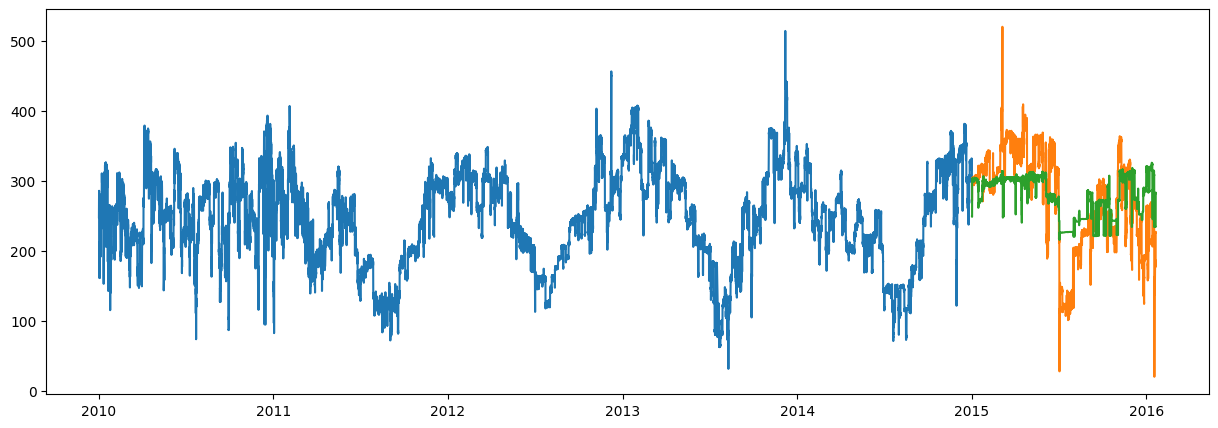

In [46]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(train[target])
ax.plot(test[target])
ax.plot(pred)
plt.show()

In [47]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
print('R2 score:', r2_score(test[target], pred))
print('MAE score:', mean_absolute_error(test[target], pred))
print('MSE score:', mean_squared_error(test[target], pred))
print('RMSE score:', np.sqrt(mean_squared_error(test[target], pred)))
print('MAPE score:', mean_absolute_percentage_error(test[target], pred))

R2 score: 0.4221797196652508
MAE score: 43.14236177172405
MSE score: 2851.8711223797727
RMSE score: 53.40291305144105
MAPE score: 0.1978817933405556


#### Пробуем учесть сезонность в модели

In [7]:
#pip install prophet

In [8]:
from prophet import Prophet

In [71]:
df_proph = data1.reset_index()
df_proph.columns = ['ds', 'y', 'x1', 'x2']

In [94]:
df_prophet = df_proph.set_index('ds').diff().dropna().reset_index()

In [95]:
train = df_prophet[(df_prophet['ds'] >= '2011-01-01')&(df_prophet['ds'] < '2015-01-01')]
test = df_prophet[df_prophet['ds'] >= '2015-01-01']

In [96]:
m = Prophet(yearly_seasonality=20)
m.add_regressor('x1')
m.add_regressor('x2')
m.fit(train)
future = m.make_future_dataframe(periods = test.shape[0], freq = 'h')
future[['x1', 'x2']] = df_prophet[['x1', 'x2']]
forecast = m.predict(future)
pred = forecast[forecast['ds'] >= '2015-01-01']

08:57:43 - cmdstanpy - INFO - Chain [1] start processing
08:57:50 - cmdstanpy - INFO - Chain [1] done processing


,ds,x1,x2
44285,2016-01-20 05:00:00,-0.1922,-0.1216
44286,2016-01-20 06:00:00,-0.3034,0.3406
44287,2016-01-20 07:00:00,0.0391,0.0108
44288,2016-01-20 08:00:00,0.1171,-1.4217
44289,2016-01-20 09:00:00,0.2808,0.1028


In [112]:
train = train.rename(columns = {'y':target})
test = test.rename(columns = {'y':target})
pred = pred.rename(columns = {'yhat':target})
df_proph = df_proph.rename(columns = {'y':target})

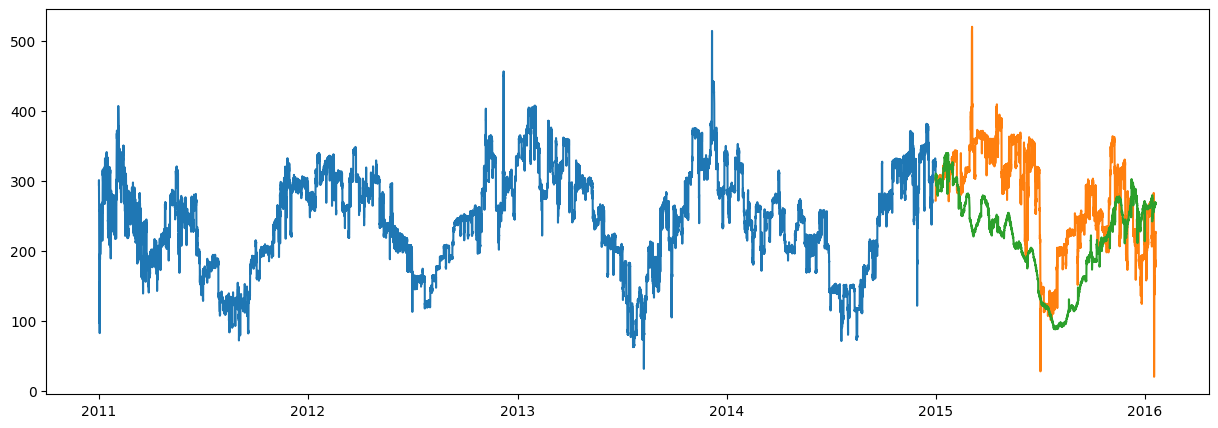

In [113]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(train['ds'], df_proph.loc[8759, target] + train[target].cumsum())
ax.plot(test['ds'], df_proph.loc[43823, target] + test[target].cumsum())
ax.plot(pred['ds'], df_proph.loc[43823, target] + pred[target].cumsum())
plt.show()

In [111]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
print('R2 score:', r2_score(test[target], pred[target]))
print('MAE score:', mean_absolute_error(test[target], pred[target]))
print('MSE score:', mean_squared_error(test[target], pred[target]))
print('RMSE score:', np.sqrt(mean_squared_error(test[target], pred[target])))
print('MAPE score:', mean_absolute_percentage_error(test[target], pred[target]))

R2 score: -0.14070642839900316
MAE score: 3.1847646149441555
MSE score: 32.60891241339369
RMSE score: 5.710421386674865
MAPE score: 3182784809936.8315
